# Objective/Introduction/Business Problem:

I am a prospective businessman looking to open up a restuarant in the Delhi, the Capital City of India. I'd like my restaurant to be homely Indian cuisine, featuring simple dishes that would be of the sort cooked in typical Indian households. I'm scouting for ideal locations to build my restaurant that would ideally not be around deeply clustured restaurants and cafes.

People wanting to open up restaurants of the above mentioned variety would benefit from this project.

- dataset obtained from : https://www.99acres.com/property-rates-and-price-trends-in-delhi-ncr 
specifically the independent/builder section table

### Objectives

- Introduction where you discuss the business problem and who would be interested in this project.

- Data where you describe the data that will be used to solve the problem and the source of the data.

- Methodology section which represents the main component of the report where you discuss and describe any exploratory    data analysis that you did, any inferential statistical testing that you performed, if any, and what machine   learnings  were used and why.

- Results section where you discuss the results.

- Discussion section where you discuss any observations you noted and any recommendations you can make based on the    Conclusion section where you conclude the report.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
raw = pd.read_csv('delhi land prices final.csv')
raw

,Borough,Average Price per sqft.,Latitude,Longitude
0,Delhi East,6002.793103,28.6280,77.2956
1,Delhi West,7622.717949,28.6663,77.0680
2,Delhi Central,13762.833330,28.6643,77.2167
3,Delhi Dwarka,6171.812500,28.5823,77.0500
4,Delhi South,12011.250000,28.4817,77.1873
5,Delhi North,9808.301887,28.7886,77.1412


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# library to handle JSON files
import json 

!conda install -c conda-forge geopy --yes 
# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# library to handle requests
import requests 

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Software\Anaconda

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38haa244fe_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following packages will be UPDATED:

  conda                               4.10.0-py38haa244fe_1 --> 4.10.1-py38haa244fe_0




conda-4.10.1         | 3.1 MB    |            |   0% 
conda-4.10.1         | 3.1 MB    |            |   1% 
conda-4.10.1         | 3.1 MB    | 1          |   2% 
conda-4.10.1         | 3.1 MB    | 4          |   5% 
conda-4.10.1         | 3.1 MB    | 8          |   8% 
conda-4.10.1         | 3.1 MB    | #3         |  13% 
conda-4.10.1         | 3.1 MB    | #5         

In [4]:
import folium

In [5]:
CLIENT_ID = 'C3FRVJ3JBBJ3KZLRUBYPTVUS4HCM5T4N42CJATH4XLCVTQLD' # your Foursquare ID
CLIENT_SECRET = 'FUGOMY3YU2XYEKNVWA5NOHA3GZ55HKSHYXSD0JLPEGAY4MMD' # your Foursquare Secret
ACCESS_TOKEN = 'QR0ZJAT3UXFDDOOPWPOFK4XF14QGIPH2KOZCMWKFX4KD34AG' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C3FRVJ3JBBJ3KZLRUBYPTVUS4HCM5T4N42CJATH4XLCVTQLD
CLIENT_SECRET:FUGOMY3YU2XYEKNVWA5NOHA3GZ55HKSHYXSD0JLPEGAY4MMD


In [6]:
address = 'Delhi, IN'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address,timeout = None)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Delhi are 28.6517178, 77.2219388.


In [7]:
map_delhi = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# add markers to map
for lat, lng, borough in zip(raw['Latitude'], raw['Longitude'], raw['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_delhi)  
    
map_delhi

In [8]:


borough_latitude = raw.loc[0, 'Latitude'] # neighborhood latitude value
borough_longitude = raw.loc[0, 'Longitude'] # neighborhood longitude value

borough_name = raw.loc[0, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, 
                                                               borough_latitude, 
                                                               borough_longitude))

Latitude and longitude values of Delhi East are 28.628, 77.2956.


In [9]:
LIMIT = 100
radius = 2000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=C3FRVJ3JBBJ3KZLRUBYPTVUS4HCM5T4N42CJATH4XLCVTQLD&client_secret=FUGOMY3YU2XYEKNVWA5NOHA3GZ55HKSHYXSD0JLPEGAY4MMD&v=20180604&ll=28.628,77.2956&radius=2000&limit=100'

In [10]:
results = requests.get(url).json()

In [11]:
results

{'meta': {'code': 200, 'requestId': '607a3e78dc2d790c330895b6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'East Delhi',
  'headerFullLocation': 'East Delhi, Delhi',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 34,
  'suggestedBounds': {'ne': {'lat': 28.646000018000016,
    'lng': 77.31606873443715},
   'sw': {'lat': 28.609999981999984, 'lng': 77.27513126556283}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d2721a4f7a9224b5361e89f',
       'name': 'Balco Market',
       'location': {'address': 'I.P. Extension',
        'crossStreet': 'Balco Market',
        'lat': 28.63143831679606,
        'lng': 77.30427316244476,
        'labeledLatLngs': [{'label':

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-13-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Balco Market,Market,28.631438,77.304273
1,Pizza Hut,Pizza Place,28.637009,77.286318
2,Scorpion cafe,Sandwich Place,28.621375,77.301252
3,Classic Ice Cream Parlour,Arcade,28.641731,77.293177
4,v3s mall,Arcade,28.636856,77.285363


In [14]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

34 venues were returned by Foursquare.


In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [16]:
delhi_venues = getNearbyVenues(names=raw['Borough'],
                                   latitudes=raw['Latitude'],
                                   longitudes=raw['Longitude']
                                  )

Delhi East
Delhi West
Delhi Central
Delhi Dwarka
Delhi South
Delhi North


In [17]:
print(delhi_venues.shape)
delhi_venues.head()

(128, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Delhi East,28.628,77.2956,Balco Market,28.631438,77.304273,Market
1,Delhi East,28.628,77.2956,Pizza Hut,28.637009,77.286318,Pizza Place
2,Delhi East,28.628,77.2956,Scorpion cafe,28.621375,77.301252,Sandwich Place
3,Delhi East,28.628,77.2956,Classic Ice Cream Parlour,28.641731,77.293177,Arcade
4,Delhi East,28.628,77.2956,v3s mall,28.636856,77.285363,Arcade


In [18]:
summary = delhi_venues.groupby('Borough').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Borough Latitude', 'Borough Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head()

,Borough,Count
0,Delhi North,6
1,Delhi West,6
2,Delhi South,8
3,Delhi Dwarka,27
4,Delhi East,34


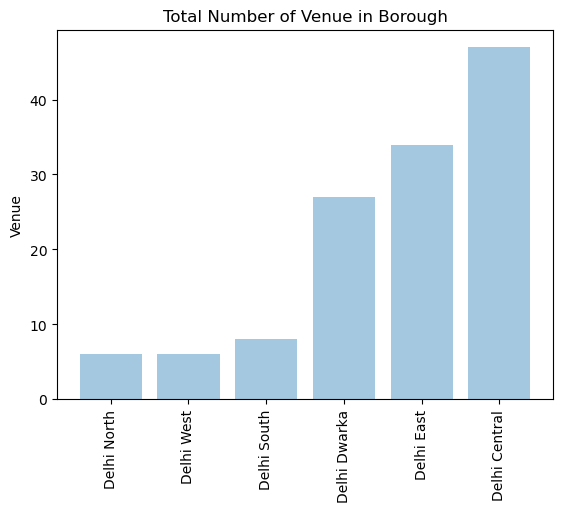

In [19]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.Borough
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in Borough')
plt.xticks(rotation=90)

plt.show()

In [20]:
print('There are {} uniques categories.'.format(len(delhi_venues['Venue Category'].unique())))

There are 50 uniques categories.


B.4

In [21]:
# one hot encoding
delhi_onehot = pd.get_dummies(delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot['Borough'] = delhi_venues['Borough'] 

# move neighborhood column to the first column
list_column = delhi_onehot.columns.tolist()
number_column = int(list_column.index('Borough'))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
delhi_onehot = delhi_onehot[list_column]

delhi_onehot.head()

,Borough,ATM,Arcade,Asian Restaurant,Auto Workshop,Boutique,Breakfast Spot,Burger Joint,Bus Station,Café,Candy Store,Chinese Restaurant,Cocktail Bar,Coffee Shop,Dessert Shop,Donut Shop,Electronics Store,Event Service,Farm,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Court,Food Truck,Grocery Store,Gym,Hardware Store,Historic Site,Hotel,Indian Restaurant,Italian Restaurant,Lake,Light Rail Station,Market,Miscellaneous Shop,Mobile Phone Shop,North Indian Restaurant,Paper / Office Supplies Store,Park,Photography Studio,Pizza Place,Resort,Restaurant,Sandwich Place,Shoe Store,Shopping Mall,Snack Place,South Indian Restaurant,Trail,Train Station,Yoga Studio
0,Delhi East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Delhi East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Delhi East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Delhi East,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Delhi East,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
delhi_grouped = delhi_onehot.groupby('Borough').mean().reset_index()
delhi_grouped.head()

,Borough,ATM,Arcade,Asian Restaurant,Auto Workshop,Boutique,Breakfast Spot,Burger Joint,Bus Station,Café,Candy Store,Chinese Restaurant,Cocktail Bar,Coffee Shop,Dessert Shop,Donut Shop,Electronics Store,Event Service,Farm,Fast Food Restaurant,Flea Market,Food & Drink Shop,Food Court,Food Truck,Grocery Store,Gym,Hardware Store,Historic Site,Hotel,Indian Restaurant,Italian Restaurant,Lake,Light Rail Station,Market,Miscellaneous Shop,Mobile Phone Shop,North Indian Restaurant,Paper / Office Supplies Store,Park,Photography Studio,Pizza Place,Resort,Restaurant,Sandwich Place,Shoe Store,Shopping Mall,Snack Place,South Indian Restaurant,Trail,Train Station,Yoga Studio
0,Delhi Central,0.0,0.000000,0.021277,0.0,0.021277,0.0,0.021277,0.000000,0.021277,0.000000,0.021277,0.000000,0.000000,0.063830,0.021277,0.000000,0.000000,0.000000,0.085106,0.06383,0.021277,0.000000,0.021277,0.021277,0.000000,0.021277,0.021277,0.063830,0.148936,0.021277,0.021277,0.021277,0.042553,0.021277,0.000000,0.000000,0.021277,0.000000,0.000000,0.042553,0.000000,0.000000,0.021277,0.0,0.000000,0.085106,0.000000,0.021277,0.021277,0.000000
1,Delhi Dwarka,0.0,0.000000,0.037037,0.0,0.000000,0.0,0.000000,0.000000,0.074074,0.037037,0.037037,0.037037,0.037037,0.000000,0.000000,0.074074,0.000000,0.000000,0.148148,0.00000,0.000000,0.000000,0.037037,0.037037,0.037037,0.000000,0.000000,0.037037,0.148148,0.000000,0.000000,0.037037,0.037037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.000000,0.0,0.037037,0.000000,0.000000,0.000000,0.037037,0.000000
2,Delhi East,0.0,0.058824,0.000000,0.0,0.000000,0.0,0.000000,0.029412,0.117647,0.000000,0.029412,0.000000,0.029412,0.058824,0.000000,0.000000,0.000000,0.000000,0.058824,0.00000,0.029412,0.029412,0.029412,0.000000,0.029412,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.029412,0.029412,0.000000,0.029412,0.029412,0.000000,0.058824,0.000000,0.088235,0.000000,0.029412,0.029412,0.0,0.058824,0.029412,0.029412,0.000000,0.000000,0.029412
3,Delhi North,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.333333,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Delhi South,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.00000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.250000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = delhi_grouped['Borough']

for ind in np.arange(delhi_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Delhi Central,Indian Restaurant,Fast Food Restaurant,Snack Place,Dessert Shop,Flea Market,Hotel,Pizza Place,Market,Boutique,Italian Restaurant
1,Delhi Dwarka,Fast Food Restaurant,Indian Restaurant,Electronics Store,Pizza Place,Café,Chinese Restaurant,Food Truck,Grocery Store,Train Station,Hotel
2,Delhi East,Café,Pizza Place,Dessert Shop,Arcade,Shopping Mall,Park,Fast Food Restaurant,Food & Drink Shop,Indian Restaurant,Food Truck
3,Delhi North,Farm,Event Service,Bus Station,Resort,Photography Studio,Yoga Studio,Coffee Shop,Food Court,Food & Drink Shop,Flea Market
4,Delhi South,Hotel,Farm,Indian Restaurant,Restaurant,Resort,Food Truck,Yoga Studio,Coffee Shop,Food & Drink Shop,Flea Market


b.5

In [25]:
# set number of clusters
kclusters = 3

delhi_grouped_clustering = delhi_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_
labels

array([1, 1, 1, 2, 2, 0])

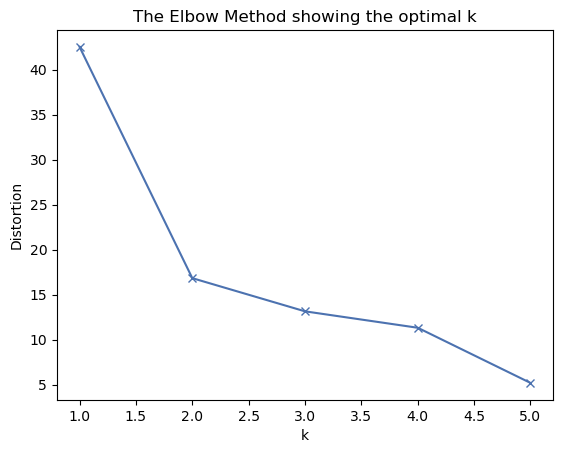

In [26]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,6)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(delhi_grouped_clustering)
    #kmeanModel.fit(delhi_grouped_clustering)
    distortions.append(sum(np.min(cdist(delhi_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / delhi_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [27]:
delhi_merged = raw

# add clustering labels
delhi_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(boroughs_venues_sorted.set_index('Borough'), on='Borough')

delhi_merged.head() # check the last columns!

,Borough,Average Price per sqft.,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Delhi East,6002.793103,28.6280,77.2956,1,Café,Pizza Place,Dessert Shop,Arcade,Shopping Mall,Park,Fast Food Restaurant,Food & Drink Shop,Indian Restaurant,Food Truck
1,Delhi West,7622.717949,28.6663,77.0680,1,ATM,Shoe Store,Indian Restaurant,Breakfast Spot,Train Station,Auto Workshop,Boutique,Donut Shop,Food Court,Food & Drink Shop
2,Delhi Central,13762.833330,28.6643,77.2167,1,Indian Restaurant,Fast Food Restaurant,Snack Place,Dessert Shop,Flea Market,Hotel,Pizza Place,Market,Boutique,Italian Restaurant
3,Delhi Dwarka,6171.812500,28.5823,77.0500,2,Fast Food Restaurant,Indian Restaurant,Electronics Store,Pizza Place,Café,Chinese Restaurant,Food Truck,Grocery Store,Train Station,Hotel
4,Delhi South,12011.250000,28.4817,77.1873,2,Hotel,Farm,Indian Restaurant,Restaurant,Resort,Food Truck,Yoga Studio,Coffee Shop,Food & Drink Shop,Flea Market


In [28]:
count_venue = delhi_merged
count_venue = count_venue.drop(['Borough','Average Price per sqft.', 'Latitude', 'Longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue,ATM,Café,Farm,Fast Food Restaurant,Hotel,Indian Restaurant
0,0,0,1,0,0,0
1,1,1,0,0,0,1
2,0,0,0,1,1,0


Text(0, 0.5, 'Clusters')

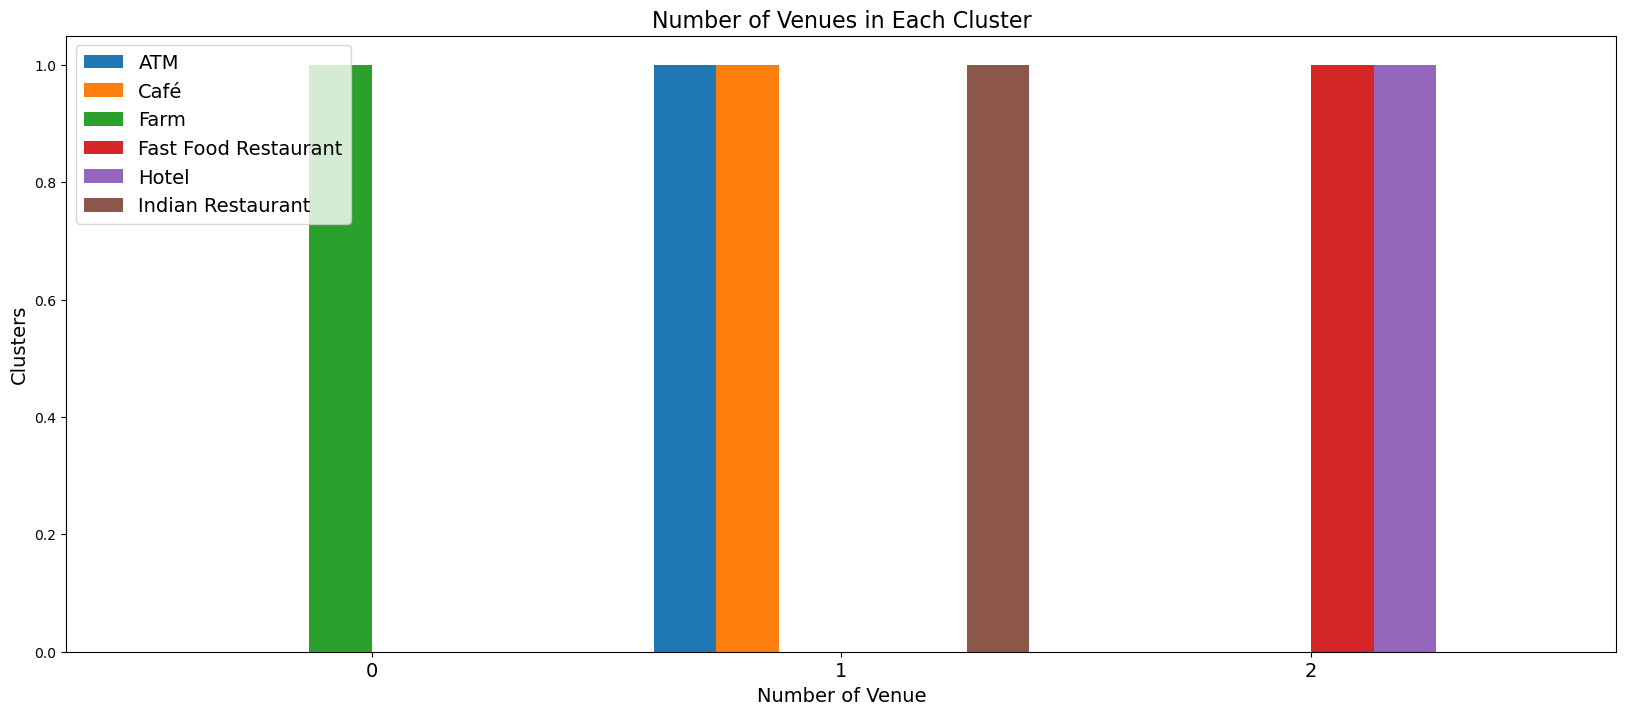

In [29]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

In [30]:
Cluster_labels = {'Clusters': [0,1,2], 'Labels': ["Hotels","Multiple Social Venues","Resorts"]}
Cluster_labels = pd.DataFrame(data=Cluster_labels)
Cluster_labels

,Clusters,Labels
0,0,Hotels
1,1,Multiple Social Venues
2,2,Resorts


In [31]:
data_process = raw.sort_values('Average Price per sqft.').reset_index(drop=True)
data_process = data_process.drop(['Latitude', 'Longitude'], axis=1)
data_process.head()

,Borough,Average Price per sqft.,Cluster Labels
0,Delhi East,6002.793103,1
1,Delhi Dwarka,6171.812500,2
2,Delhi West,7622.717949,1
3,Delhi North,9808.301887,0
4,Delhi South,12011.250000,2


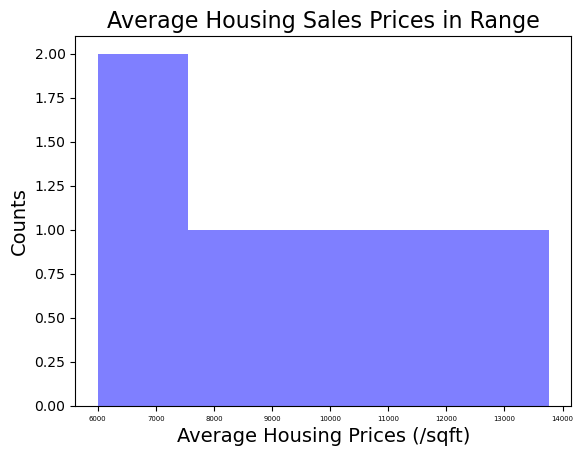

In [32]:
num_bins = 5
n, bins, patches = plt.hist(data_process['Average Price per sqft.'], num_bins, facecolor='blue', alpha=0.5)
plt.title("Average Housing Sales Prices in Range",fontsize= 16)
plt.xticks(fontsize=5)
plt.xticks(rotation=0)
plt.xlabel('Average Housing Prices (/sqft)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

In [33]:
level = []
for i in range(0,len(data_process)):
    
    if (data_process['Average Price per sqft.'][i] >= 6000 and data_process['Average Price per sqft.'][i] < 7000):
        level.append("Low Level HSP")
    elif (data_process['Average Price per sqft.'][i] >= 7000 and data_process['Average Price per sqft.'][i] < 8000):
        level.append("Mid Level HSP")
    elif (data_process['Average Price per sqft.'][i] >= 8000 and data_process['Average Price per sqft.'][i] < 15000):
        level.append("High Level HSP")
      

data_process['Level_labels'] = level
data_process

,Borough,Average Price per sqft.,Cluster Labels,Level_labels
0,Delhi East,6002.793103,1,Low Level HSP
1,Delhi Dwarka,6171.812500,2,Low Level HSP
2,Delhi West,7622.717949,1,Mid Level HSP
3,Delhi North,9808.301887,0,High Level HSP
4,Delhi South,12011.250000,2,High Level HSP
5,Delhi Central,13762.833330,1,High Level HSP


In [34]:
top3 = delhi_venues.groupby(['Borough','Venue Category']).size().reset_index(name='Counts')
top3 = top3.sort_values(['Borough','Counts'],ascending=False).groupby('Borough').head(3).reset_index(drop=True)

top3['Join'] = top3['Counts'].map(str) + " " + top3['Venue Category']
top3 = top3.groupby(['Borough'])['Join'].apply(", ".join).reset_index()

top3.head()

,Borough,Join
0,Delhi Central,"7 Indian Restaurant, 4 Fast Food Restaurant, 4..."
1,Delhi Dwarka,"4 Fast Food Restaurant, 4 Indian Restaurant, 2..."
2,Delhi East,"4 Café, 3 Pizza Place, 2 Arcade"
3,Delhi North,"2 Farm, 1 Bus Station, 1 Event Service"
4,Delhi South,"2 Farm, 2 Hotel, 1 Food Truck"


Result

In [35]:
import numpy as np

result = pd.merge(delhi_merged, 
                    top3[['Borough', 'Join']],
                    left_on = 'Borough',
                    right_on = 'Borough',
                    how = 'left')
result= pd.merge(result, 
                    Cluster_labels[['Clusters', 'Labels']],
                    left_on = 'Cluster Labels',
                    right_on = 'Clusters',
                    how = 'left')
result = pd.merge(result, 
                    data_process[['Borough', 'Level_labels']],
                    left_on = 'Borough',
                    right_on = 'Borough',
                    how = 'left')

result = result.drop(['Clusters'], axis=1)
result.head(3)

,Borough,Average Price per sqft.,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Join,Labels,Level_labels
0,Delhi East,6002.793103,28.6280,77.2956,1,Café,Pizza Place,Dessert Shop,Arcade,Shopping Mall,Park,Fast Food Restaurant,Food & Drink Shop,Indian Restaurant,Food Truck,"4 Café, 3 Pizza Place, 2 Arcade",Multiple Social Venues,Low Level HSP
1,Delhi West,7622.717949,28.6663,77.0680,1,ATM,Shoe Store,Indian Restaurant,Breakfast Spot,Train Station,Auto Workshop,Boutique,Donut Shop,Food Court,Food & Drink Shop,"1 ATM, 1 Auto Workshop, 1 Breakfast Spot",Multiple Social Venues,Mid Level HSP
2,Delhi Central,13762.833330,28.6643,77.2167,1,Indian Restaurant,Fast Food Restaurant,Snack Place,Dessert Shop,Flea Market,Hotel,Pizza Place,Market,Boutique,Italian Restaurant,"7 Indian Restaurant, 4 Fast Food Restaurant, 4...",Multiple Social Venues,High Level HSP


In [36]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=9.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, join, cluster_number, label in zip(result['Latitude'], result['Longitude'], result['Borough'], result['Labels'], result['Join'], result['Cluster Labels'], result['Level_labels']):
    label = folium.Popup(str(poi) + " / " + str(cluster) + "-" + str(label) + " / " + str(join), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        color= rainbow[cluster_number-1],
        popup=label,
        fill_color = rainbow[cluster_number-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [37]:
#!wget --quiet https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Delhi/Delhi_Wards.geojson -O delhi_geo.json
    
#https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Delhi/Delhi_Wards.geojson  
print('GeoJSON file downloaded!')

delhi_geo = r'stanford-nj696zj1674-geojson1.json'

#Delhi
latitude = 28.69
longitude = 76.95

# display Delhi
delhi_map = folium.Map(location=[latitude, longitude], zoom_start=10)

GeoJSON file downloaded!


In [38]:
delhi_map.choropleth(
    geo_data=delhi_geo,
    data=raw,
    columns=['Borough','Average Price per sqft.'],
    key_on='feature.properties.name_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='House Sales Price in Delhi',
    highlight=True
)

markers_colors = []
for lat, lon, poi, cluster, join, cluster_number, label in zip(result['Latitude'], result['Longitude'], result['Borough'], result['Labels'], result['Join'], result['Cluster Labels'], result['Level_labels']):
    label = folium.Popup(str(poi) + " / " + str(cluster) + "-" + str(label) + " / " + str(join), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color= rainbow[cluster_number],
        fill=True,
        fill_color= rainbow[cluster_number],
        fill_opacity=1).add_to(delhi_map)
   


 ##display map
delhi_map